In [ ]:
# below program adds two numbers using a quantum computer
# the program is run on a simulator as well as on a real quantum computer
# it uses Quatntum Fourier transform to add two numbers

In [84]:
# importing modules and libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import numpy as np
from qiskit.circuit.library import QFT
from qiskit.circuit.library.standard_gates.u1 import CU1Gate
from qiskit.visualization import plot_histogram

In [85]:
# function to create the initial state of the circuit with 2 given numbers
def set_input_state(a,b,bit_s):
    # function to convert a number to binary
    get_binary=lambda x:'{0:{fill}{bit_s}b}'.format(x,fill='0',bit_s=bit_s)
    # creating quantum registers for numbers a
    r_a=QuantumRegister(bit_s, name='a')
    # creating quantum registers for numbers b
    r_b=QuantumRegister(bit_s, name='b')
    # creating classical registers to measure the circuit
    cr=ClassicalRegister(bit_s, name='c')
    # creating a quantum circuit
    qc=QuantumCircuit(r_a, r_b, cr)
    # getting the binary representation of the numbers
    a_binary=get_binary(a)
    b_binary=get_binary(b)
    # applying x-gate to the qubits of the circuit based on the binary representation of the numbers
    # X-gate flips the qubit from 0 to 1 and vice versa,initially all the qubits are in state 0
    for i in range(bit_s):
        if a_binary[i]=='1':
            qc.x(r_a[bit_s-1-i])
        if b_binary[i]=='1':
            qc.x(r_b[bit_s-1-i])
    return qc, r_a, r_b, cr

In [86]:
# Adding rotations to the circuit in order to get the sum of the numbers
def controlled_rotations(qc,r_a,r_b,n,bit_s):
    for i in range(n+1):
        qc.cp(np.pi/2**i,r_b[n-i],r_a[n])

In [87]:
# initialising the numbers to be added
a=1
b=1
# number of qubits to be used for each number
bit_s=2
# creating the circuit
qc,r_a,r_b,cr=set_input_state(a,b,bit_s)
# converting to frequency domain using Quantum Fourier Transform
qc.append(QFT(bit_s,do_swaps=False),r_a)
# adding rotations to the circuit
for i in range(bit_s):
    controlled_rotations(qc,r_a,r_b,bit_s-1-i,bit_s)
# converting back using Inverse Quantum Fourier Transform
qc.append(QFT(bit_s,do_swaps=False).inverse(),r_a)
# measuring the circuit
qc.measure(r_a,cr)

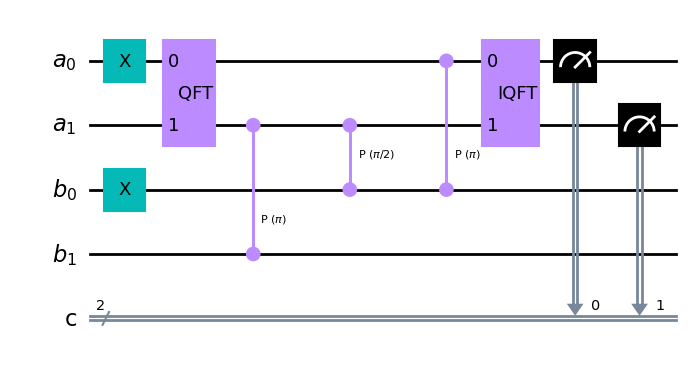

In [88]:
# drawing the circuit
qc.draw('mpl')

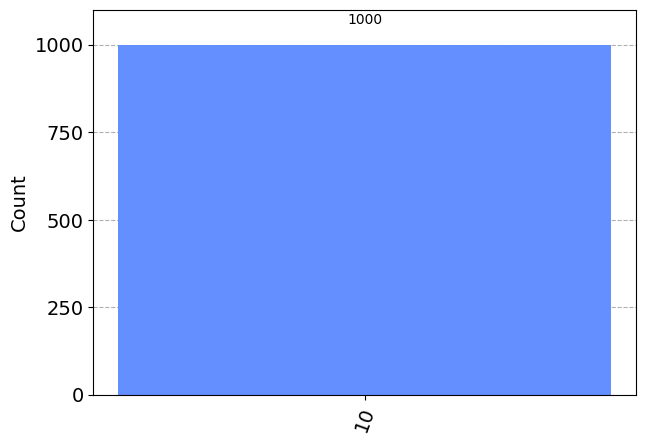

In [89]:
# To run the circuit using simulator use the below code
backend=Aer.get_backend('qasm_simulator')
job=execute(qc,backend,shots=1000)
counts=job.result().get_counts(qc)
plot_histogram(counts)

In [90]:
# nessasary imports to run the circuit on real quantum computer

from qiskit_ibm_provider import IBMProvider
from qiskit.tools.monitor import job_monitor
# Use your IBM Quantum Experience token to load your account
IBMProvider.save_account(token='fc9764d6ddc72b895aec2189a792025fe4e8a37698378c45198dd34d1dd2411ef27f8297105e2c6fcb7884bc9a31c4efdc6f7127bfbdfc06e2d3c8cee5237375',overwrite=True)
# write the address of the quantum hub you want to use
provider=IBMProvider(instance='ibm-q/open/main')

In [91]:
# choose the backend you want to use
backend=provider.get_backend('ibm_lagos')
# run the circuit on the backend given a specific number of shots
job=execute(qc,backend,shots=1000)
# monitor the job
job_monitor(job)

Job Status: job has successfully run


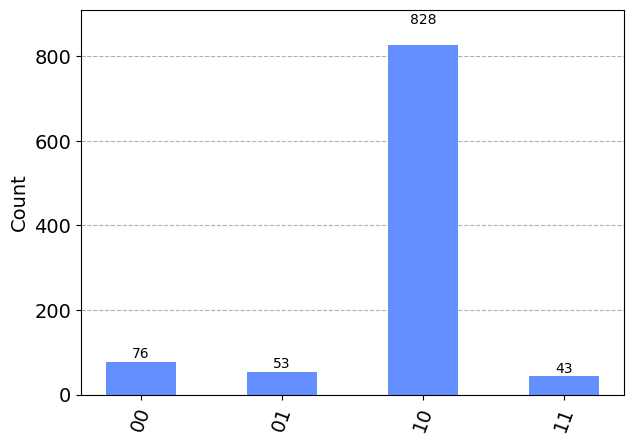

In [92]:
# get the counts of the circuit
counts=job.result().get_counts(qc)
# plot the histogram of the counts
plot_histogram(counts)